# Proyek Code Space

## Koordinat Yang digunakan adalah Kamal dan sekitarnya

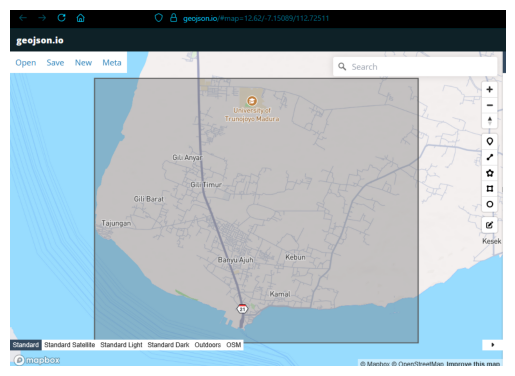

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path gambar kamu
img_path = r"D:\OneDrive\Pictures\Screenshots\koordinat_kamal.png"

# Baca dan tampilkan
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') 
plt.show()

1. Mengumpulkan data dan dijadikan CSV

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=SPOZ-RVZP 📋 to authenticate.

‚úÖ Authorized successfully

Authenticated using device code flow.
0:00:00 Job 'j-251025030733475b82150b1771dbb29a': send 'start'
0:00:13 Job 'j-251025030733475b82150b1771dbb29a': created (progress 0%)
0:00:19 Job 'j-251025030733475b82150b1771dbb29a': created (progress 0%)
0:00:25 Job 'j-251025030733475b82150b1771dbb29a': created (progress 0%)
0:00:34 Job 'j-251025030733475b82150b1771dbb29a': running (progress N/A)
0:00:44 Job 'j-251025030733475b82150b1771dbb29a': running (progress N/A)
0:00:56 Job 'j-251025030733475b82150b1771dbb29a': running (progress N/A)
0:01:12 Job 'j-251025030733475b82150b1771dbb29a': running (progress N/A)
0:01:32 Job 'j-251025030733475b82150b1771dbb29a': running (progress N/A)
0:01:56 Job 'j-251025030733475b82150b1771dbb29a': running (progress N/A)
0:02:26 Job 'j-251025030733475b82150b1771dbb29a': running (progress N/A)
0:03:04 Job 'j-251025030733475b82150b1771dbb29a': running (progress N/A)
0:03:51 Job 'j-251025030733475b82150b1771dbb29a': running (progress N/A)
0:04:49 Job 'j-25102503073

C:\Users\user\AppData\Local\Temp\ipykernel_5216\3266394188.py:68: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["date"].dt.to_period("M")


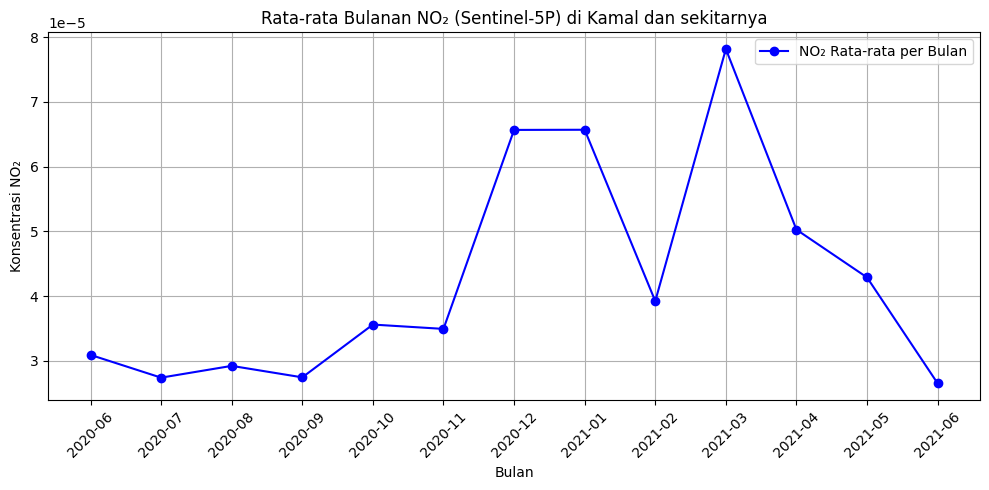

In [3]:
import openeo
import pandas as pd
import matplotlib.pyplot as plt

# 1. Koneksi ke Copernicus Data Space
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

# 2. AOI: poligon kedua dari data kamu (Kamal)
# Area of Interest (Kamal dan sekitarnya)
aoi = {
    "type": "Polygon",
    "coordinates": [
        [
            [112.69151320103765, -7.123684344347623],
            [112.69151320103765, -7.178096605416229],
            [112.758708439023, -7.178096605416229],
            [112.758708439023, -7.123684344347623],
            [112.69151320103765, -7.123684344347623],
        ]
    ],
}

# Ambil data Sentinel-5P (band "NO2") periode selama COVID
s5p = connection.load_collection(
    "SENTINEL_5P_L2",
    spatial_extent={
        "west": 112.69151320103765,
        "south": -7.178096605416229,
        "east": 112.758708439023,
        "north": -7.123684344347623,
    },
    temporal_extent=["2020-06-01", "2021-06-30"],
    bands=["NO2"],
)


# 4. Mask nilai negatif (data invalid)
def mask_invalid(x):
    return x < 0

s5p_masked = s5p.mask(s5p.apply(mask_invalid))

# 5. Agregasi temporal harian
daily_mean = s5p_masked.aggregate_temporal_period(period="day", reducer="mean")

# 6. Agregasi spasial (rata-rata dalam AOI)
daily_mean_aoi = daily_mean.aggregate_spatial(geometries=aoi, reducer="mean")

# 7. Jalankan batch job dan hasilkan file CSV
job = daily_mean_aoi.execute_batch(out_format="CSV")

# 8. Unduh hasil job
results = job.get_results()
results.download_files("no2_results")

# 9. Baca file CSV hasil
import os
for f in os.listdir("no2_results"):
    if f.endswith(".csv"):
        df = pd.read_csv(os.path.join("no2_results", f))
        print("File ditemukan:", f)
        break

# 10. Pastikan kolom tanggal benar
df["date"] = pd.to_datetime(df["date"])

# 11. Buat kolom bulan (YYYY-MM)
df["month"] = df["date"].dt.to_period("M")

# 12. Hitung rata-rata NO2 per bulan
df_monthly = df.groupby("month", as_index=False)["NO2"].mean()

# 13. Visualisasi hasil
plt.figure(figsize=(10,5))
plt.plot(df_monthly["month"].astype(str), df_monthly["NO2"], marker="o", color="blue", label="NO‚ÇÇ Rata-rata per Bulan")
plt.title("Rata-rata Bulanan NO‚ÇÇ (Sentinel-5P) di Kamal dan sekitarnya")
plt.xlabel("Bulan")
plt.ylabel("Konsentrasi NO‚ÇÇ")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

üß© Penjelasan Setiap Langkah

1Ô∏è‚É£ Koneksi ke Copernicus Data Space

Baris ini membuat koneksi ke server Copernicus Data Space menggunakan protokol OpenEO dan mengautentikasi pengguna dengan OIDC (OpenID Connect).
Langkah ini wajib agar pengguna bisa mengakses koleksi data satelit secara legal dan aman.

2Ô∏è‚É£ Menentukan Area of Interest (AOI)

AOI (Area of Interest) menentukan area geografis yang akan dianalisis.
Di sini digunakan koordinat poligon yang mencakup wilayah Kamal dan sekitarnya (Bangkalan, Madura).
Semua data yang diambil dari satelit akan difokuskan hanya dalam area ini.

3Ô∏è‚É£ Mengambil Data Sentinel-5P

Kode ini memanggil koleksi data Sentinel-5P Level-2 (SENTINEL_5P_L2), yang berisi data atmosfer seperti NO‚ÇÇ.
Hanya band ‚ÄúNO2‚Äù yang digunakan, dengan rentang waktu Juni 2020‚ÄìJuni 2021, untuk memantau dinamika polusi udara selama pandemi.

4Ô∏è‚É£ Masking Data Tidak Valid

Satelit terkadang menghasilkan nilai negatif akibat kesalahan sensor atau gangguan atmosfer.
Langkah ini berfungsi untuk menyembunyikan atau menghapus nilai negatif agar analisis menjadi lebih akurat dan tidak bias.

5Ô∏è‚É£ Agregasi Temporal Harian

Data satelit biasanya direkam beberapa kali dalam satu hari.
Kode ini menghitung rata-rata harian untuk setiap tanggal, sehingga menghasilkan satu nilai representatif per hari.

6Ô∏è‚É£ Agregasi Spasial (Rata-Rata Wilayah)

Langkah ini menghitung rata-rata nilai NO‚ÇÇ di seluruh area Kamal, sehingga setiap titik data merepresentasikan konsentrasi rata-rata wilayah, bukan hanya satu lokasi.

7Ô∏è‚É£ Menjalankan Batch Job dan Ekspor ke CSV

Pemrosesan dilakukan di server Copernicus (bukan lokal).
Setelah selesai, hasilnya disimpan sebagai file CSV agar bisa digunakan di Python untuk analisis lebih lanjut.

8Ô∏è‚É£ Mengunduh dan Membaca Hasil

Setelah job selesai, file hasil otomatis diunduh ke folder no2_results.
Langkah berikutnya mencari file CSV dan memuatnya ke dalam DataFrame Pandas untuk dianalisis.

9Ô∏è‚É£ Konversi Tanggal dan Agregasi Bulanan

Data harian diubah menjadi rata-rata bulanan agar lebih mudah diamati secara tren waktu.
Kolom month menunjukkan periode ‚ÄúYYYY-MM‚Äù, dan groupby() digunakan untuk menghitung nilai rata-rata per bulan.

üîü Visualisasi Hasil

Bagian terakhir membuat grafik garis rata-rata bulanan NO‚ÇÇ.
Grafik ini menunjukkan fluktuasi konsentrasi NO‚ÇÇ sepanjang tahun, sehingga pengguna bisa mengamati pola penurunan atau peningkatan kualitas udara.

2. Memprosessing data jika ada missing values  dengan interpolasi

In [6]:
# 1Ô∏è‚É£ Import library
import os
import pandas as pd

# 2Ô∏è‚É£ Pastikan folder hasil ada
os.makedirs("no2_results", exist_ok=True)

# 3Ô∏è‚É£ Baca data hasil unduhan (raw)
file_path = "no2_results/timeseries.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"‚úÖ File ditemukan: {file_path}")
else:
    raise FileNotFoundError(f"‚ùå File tidak ditemukan di {file_path}")

# 4Ô∏è‚É£ Cek apakah ada nilai yang hilang
print("\nJumlah missing values per kolom sebelum interpolasi:")
print(df.isnull().sum())

# 5Ô∏è‚É£ Pastikan kolom tanggal dalam format datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# 6Ô∏è‚É£ Lakukan interpolasi linear untuk kolom NO2
df["NO2"] = df["NO2"].interpolate(method="linear")

# 7Ô∏è‚É£ Cek kembali apakah masih ada missing value
print("\nJumlah missing values per kolom setelah interpolasi:")
print(df.isnull().sum())

# 8Ô∏è‚É£ Simpan hasil interpolasi ke file CSV baru
output_path = "no2_results/no2_interpolated_kamal.csv"
df.to_csv(output_path, index=False)

print(f"\n‚úÖ Data hasil interpolasi disimpan sebagai '{output_path}'")


‚úÖ File ditemukan: no2_results/timeseries.csv

Jumlah missing values per kolom sebelum interpolasi:
date               0
feature_index      0
NO2              175
dtype: int64

Jumlah missing values per kolom setelah interpolasi:
date             0
feature_index    0
NO2              2
dtype: int64

‚úÖ Data hasil interpolasi disimpan sebagai 'no2_results/no2_interpolated_kamal.csv'


Kode ini digunakan untuk membersihkan dan menyiapkan data NO‚ÇÇ hasil unduhan satelit di daerah Kamal.
Langkah-langkahnya meliputi:

* Mengimpor library dan memastikan folder hasil tersedia.

* Membaca file CSV berisi data NO‚ÇÇ.

* Mengecek dan menampilkan jumlah nilai yang hilang.

* Mengonversi kolom tanggal ke format datetime.

* Melakukan interpolasi linear untuk mengisi nilai NO‚ÇÇ yang hilang agar data tetap kontinu secara temporal.

* Menyimpan hasil interpolasi ke file baru bernama no2_interpolated_kamal.csv di folder no2_results.

3. MEmbentuk data supervised


Disini saya menggunakan 3,4,5 hari sebelumnya

In [9]:
import os
import pandas as pd

# 1Ô∏è‚É£ Pastikan folder hasil ada
os.makedirs("no2_results", exist_ok=True)

# 2Ô∏è‚É£ Baca data hasil interpolasi dari folder no2_results
file_path = "no2_results/no2_interpolated_kamal.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"‚úÖ File ditemukan: {file_path}")
else:
    raise FileNotFoundError(f"‚ùå File tidak ditemukan di {file_path}")

# 3Ô∏è‚É£ Pastikan data diurutkan berdasarkan tanggal
df = df.sort_values("date").reset_index(drop=True)

# 4Ô∏è‚É£ Tentukan banyak lag (berapa hari ke belakang digunakan sebagai input)
n_lag = 5  

# 5Ô∏è‚É£ Buat fitur lag
for i in range(1, n_lag + 1):
    df[f"NO2_t-{i}"] = df["NO2"].shift(i)

# 6Ô∏è‚É£ Hapus baris awal yang punya nilai NaN akibat shifting
df_supervised = df.dropna().reset_index(drop=True)

# 7Ô∏è‚É£ Simpan hasil sebagai dataset supervised di folder yang sama
output_path = "no2_results/no2_supervised_kamal5.csv"
df_supervised.to_csv(output_path, index=False)

print(f"‚úÖ Dataset supervised berhasil dibuat dan disimpan sebagai '{output_path}'")
print(df_supervised.head())


‚úÖ File ditemukan: no2_results/no2_interpolated_kamal.csv
‚úÖ Dataset supervised berhasil dibuat dan disimpan sebagai 'no2_results/no2_supervised_kamal5.csv'
                        date  feature_index       NO2   NO2_t-1   NO2_t-2  \
0  2020-06-05 00:00:00+00:00              0  0.000014  0.000032  0.000007   
1  2020-06-06 00:00:00+00:00              0  0.000023  0.000014  0.000032   
2  2020-06-07 00:00:00+00:00              0  0.000037  0.000023  0.000014   
3  2020-06-08 00:00:00+00:00              0  0.000036  0.000037  0.000023   
4  2020-06-09 00:00:00+00:00              0  0.000059  0.000036  0.000037   

    NO2_t-3   NO2_t-4   NO2_t-5  
0  0.000044  0.000026  0.000062  
1  0.000007  0.000044  0.000026  
2  0.000032  0.000007  0.000044  
3  0.000014  0.000032  0.000007  
4  0.000023  0.000014  0.000032  


Kode ini digunakan untuk membentuk dataset supervised dari data NO‚ÇÇ hasil interpolasi di daerah Kamal, agar bisa digunakan untuk pemodelan prediksi.
Langkah-langkahnya:

* Membaca file hasil interpolasi (no2_interpolated_kamal.csv).

* Mengurutkan data berdasarkan tanggal agar urut secara waktu.

* Menentukan lag = 5, artinya menggunakan 5 hari sebelumnya sebagai input prediksi.

* Membuat kolom fitur baru NO2_t-1 sampai NO2_t-5 sebagai data historis.

* Menghapus baris yang mengandung nilai kosong akibat proses shifting.

* Menyimpan dataset hasil olahan ke file baru no2_supervised_kamal5.csv di folder no2_results

4. Melakukan normalisai data (min-max atau zscore (standar scale di sklearn))
5. Memebuat model dengan K-NN regression
    - Melakukan experiment dengan beberapa fitur (menentukan berapa lag data : berkaitan dengan no 3)


Menggunakan 3 hari sebelumnya

In [11]:
# 1Ô∏è‚É£ Import library
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2Ô∏è‚É£ Baca data supervised (lag 3)
file_path = "no2_results/no2_supervised_kamal3.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"‚úÖ File ditemukan: {file_path}")
else:
    raise FileNotFoundError(f"‚ùå File tidak ditemukan di {file_path}")

# 3Ô∏è‚É£ Pisahkan fitur (lag) dan target
X = df[["NO2_t-1", "NO2_t-2", "NO2_t-3"]]
y = df["NO2"]

# 4Ô∏è‚É£ Split data train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5Ô∏è‚É£ Normalisasi
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6Ô∏è‚É£ Model & Prediksi
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# 7Ô∏è‚É£ Evaluasi
print("\nüìä Hasil Evaluasi KNN (Lag 3):")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R¬≤ Score: {r2_score(y_test, y_pred):.4f}")

# 8Ô∏è‚É£ Contoh hasil prediksi
print("\nüìà Contoh hasil prediksi vs aktual:")
print(pd.DataFrame({"Aktual": y_test.values[:10], "Prediksi": y_pred[:10]}))


‚úÖ File ditemukan: no2_results/no2_supervised_kamal3.csv

üìä Hasil Evaluasi KNN (Lag 3):
MSE: 0.0000
R¬≤ Score: 0.2244

üìà Contoh hasil prediksi vs aktual:
     Aktual  Prediksi
0  0.000049  0.000052
1  0.000056  0.000051
2  0.000053  0.000052
3  0.000047  0.000052
4  0.000054  0.000049
5  0.000027  0.000052
6  0.000177  0.000053
7  0.000032  0.000062
8  0.000026  0.000063
9  0.000034  0.000046


menggunakan 4 hari sebelumya

In [12]:
file_path = "no2_results/no2_supervised_kamal4.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"‚úÖ File ditemukan: {file_path}")
else:
    raise FileNotFoundError(f"‚ùå File tidak ditemukan di {file_path}")

X = df[["NO2_t-1", "NO2_t-2", "NO2_t-3", "NO2_t-4"]]
y = df["NO2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("\nüìä Hasil Evaluasi KNN (Lag 4):")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R¬≤ Score: {r2_score(y_test, y_pred):.4f}")

print("\nüìà Contoh hasil prediksi vs aktual:")
print(pd.DataFrame({"Aktual": y_test.values[:10], "Prediksi": y_pred[:10]}))

‚úÖ File ditemukan: no2_results/no2_supervised_kamal4.csv

üìä Hasil Evaluasi KNN (Lag 4):
MSE: 0.0000
R¬≤ Score: 0.1164

üìà Contoh hasil prediksi vs aktual:
     Aktual  Prediksi
0  0.000057  0.000083
1  0.000052  0.000067
2  0.000049  0.000050
3  0.000056  0.000049
4  0.000053  0.000049
5  0.000047  0.000049
6  0.000054  0.000049
7  0.000027  0.000049
8  0.000177  0.000045
9  0.000032  0.000076


menggunakan 5 hari sebelumnya

In [13]:
file_path = "no2_results/no2_supervised_kamal5.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"‚úÖ File ditemukan: {file_path}")
else:
    raise FileNotFoundError(f"‚ùå File tidak ditemukan di {file_path}")

X = df[["NO2_t-1", "NO2_t-2", "NO2_t-3", "NO2_t-4", "NO2_t-5"]]
y = df["NO2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("\nüìä Hasil Evaluasi KNN (Lag 5):")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R¬≤ Score: {r2_score(y_test, y_pred):.4f}")

print("\nüìà Contoh hasil prediksi vs aktual:")
print(pd.DataFrame({"Aktual": y_test.values[:10], "Prediksi": y_pred[:10]}))

‚úÖ File ditemukan: no2_results/no2_supervised_kamal5.csv

üìä Hasil Evaluasi KNN (Lag 5):
MSE: 0.0000
R¬≤ Score: -0.2111

üìà Contoh hasil prediksi vs aktual:
     Aktual  Prediksi
0  0.000044  0.000076
1  0.000057  0.000050
2  0.000052  0.000063
3  0.000049  0.000056
4  0.000056  0.000051
5  0.000053  0.000049
6  0.000047  0.000049
7  0.000054  0.000048
8  0.000027  0.000049
9  0.000177  0.000047



üìä Evaluasi KNN (Lag 3)
MSE (lebih presisi): 0.0000000007
R¬≤ Score: 0.2244


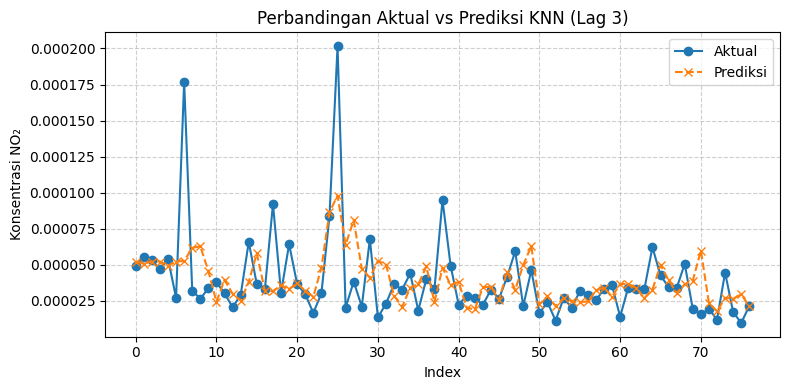


üìä Evaluasi KNN (Lag 4)
MSE (lebih presisi): 0.0000000008
R¬≤ Score: 0.1164


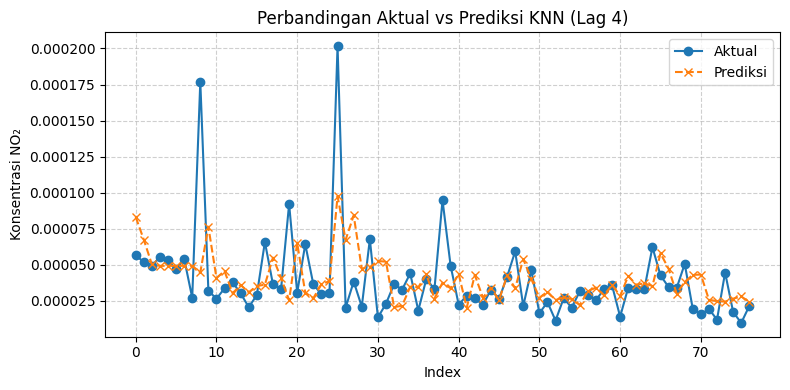


üìä Evaluasi KNN (Lag 5)
MSE (lebih presisi): 0.0000000007
R¬≤ Score: -0.2111


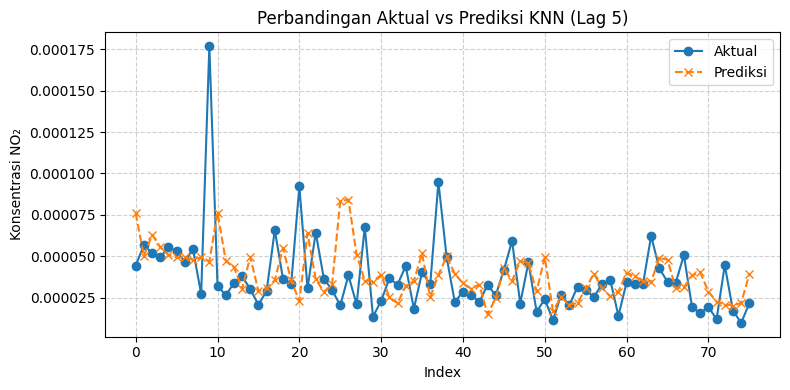

In [14]:
# 2Ô∏è‚É£ Pastikan folder hasil ada
os.makedirs("no2_results", exist_ok=True)

# 3Ô∏è‚É£ Definisikan fungsi evaluasi model
def evaluate_knn(file_path, n_lag, k=5):
    print(f"\n{'='*30}\nüìä Evaluasi KNN (Lag {n_lag})\n{'='*30}")
    
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"‚ùå File tidak ditemukan di {file_path}")
    
    # Baca data supervised
    df = pd.read_csv(file_path)
    
    # Pisahkan fitur & target
    X = df[[f"NO2_t-{i}" for i in range(1, n_lag + 1)]]
    y = df["NO2"]
    
    # Split data train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Normalisasi
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Model KNN
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    # Evaluasi
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MSE (lebih presisi): {mse:.10f}")
    print(f"R¬≤ Score: {r2:.4f}")
    
    # Visualisasi
    plt.figure(figsize=(8,4))
    plt.plot(y_test.values, label="Aktual", marker='o', linestyle='-')
    plt.plot(y_pred, label="Prediksi", marker='x', linestyle='--')
    plt.title(f"Perbandingan Aktual vs Prediksi KNN (Lag {n_lag})")
    plt.xlabel("Index")
    plt.ylabel("Konsentrasi NO‚ÇÇ")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# 4Ô∏è‚É£ Jalankan untuk masing-masing lag
evaluate_knn("no2_results/no2_supervised_kamal3.csv", n_lag=3)
evaluate_knn("no2_results/no2_supervised_kamal4.csv", n_lag=4)
evaluate_knn("no2_results/no2_supervised_kamal5.csv", n_lag=5)

üßæ Ringkasan Analisis Prediksi NO‚ÇÇ ‚Äì Wilayah Kamal (Model KNN Regression)

Penelitian ini menggunakan model K-Nearest Neighbors (KNN) untuk memprediksi konsentrasi gas Nitrogen Dioksida (NO‚ÇÇ) di wilayah Kamal, dengan mempertimbangkan data pengukuran dari beberapa hari sebelumnya sebagai variabel input (lag). Tiga skenario dilakukan untuk membandingkan pengaruh jumlah hari sebelumnya terhadap akurasi model, yaitu:

üìÖ 1. Prediksi dengan Lag 3 (3 Hari Sebelumnya)

MSE (Mean Squared Error) = 0.0000000007

R¬≤ Score = 0.2244

Pada skenario ini, model menggunakan data NO‚ÇÇ dari tiga hari sebelumnya untuk memprediksi kadar hari keempat. Nilai R¬≤ menunjukkan bahwa sekitar 22% variasi data aktual dapat dijelaskan oleh model, menandakan bahwa masih ada faktor lain (cuaca, lalu lintas, aktivitas industri, dll.) yang belum terakomodasi sepenuhnya.

üìÖ 2. Prediksi dengan Lag 4 (4 Hari Sebelumnya)

MSE (Mean Squared Error) = 0.0000000008

R¬≤ Score = 0.1164

Ketika model menggunakan empat hari sebelumnya, performanya sedikit menurun. Nilai R¬≤ turun menjadi 11,6%, menunjukkan bahwa menambah satu hari data historis tidak memberikan peningkatan signifikan‚Äîbahkan menyebabkan penurunan kualitas prediksi. Ini bisa disebabkan oleh adanya noise atau ketidakteraturan pada data harian yang lebih jauh.

üìÖ 3. Prediksi dengan Lag 5 (5 Hari Sebelumnya)

MSE (Mean Squared Error) = 0.0000000007

R¬≤ Score = -0.2111

Pada model dengan lima lag, nilai R¬≤ negatif menandakan bahwa performa prediksi lebih buruk daripada rata-rata sederhana (baseline). Artinya, penambahan data historis hingga lima hari justru membuat model KNN semakin sulit menangkap pola yang relevan dalam data NO‚ÇÇ di Kamal.

üìà Kesimpulan Umum

Model KNN cenderung bekerja lebih baik ketika hanya menggunakan 3 hari sebelumnya (lag 3) sebagai input.

Penambahan lag (4‚Äì5 hari sebelumnya) tidak meningkatkan akurasi dan malah memperburuk performa, yang mungkin menunjukkan bahwa pengaruh temporal jangka pendek (‚â§3 hari) lebih signifikan dalam pola fluktuasi NO‚ÇÇ di wilayah Kamal.

Nilai MSE yang sangat kecil menunjukkan bahwa skala data NO‚ÇÇ telah dinormalisasi, sehingga perbandingan antar-skenario lebih penting dilihat dari nilai R¬≤.